# Diabetes regression with scikit-learn

This uses the model-agnostic KernelExplainer and the TreeExplainer to explain several different regression models trained on a small diabetes dataset. This notebook is meant to give examples of how to use KernelExplainer for various models.

## Load data

In [1]:
import sklearn
from sklearn.model_selection import train_test_split
import numpy as np
import shap
import time

X,y = shap.datasets.diabetes()
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# rather than use the whole training set to estimate expected values, we summarize with
# a set of weighted kmeans, each weighted by the number of points they represent.
X_train_summary = shap.kmeans(X_train, 10)

def print_accuracy(f):
    print("Root mean squared test error = {0}".format(np.sqrt(np.mean((f(X_test) - y_test)**2))))
    time.sleep(0.5) # to let the print get out before any progress bars

shap.initjs()

## Linear regression

In [2]:
from sklearn import linear_model
lin_regr = linear_model.LinearRegression()
lin_regr.fit(X_train, y_train)

print_accuracy(lin_regr.predict)

Root mean squared test error = 58.51766133582009


### Explain a single prediction from the test set

In [3]:
ex = shap.KernelExplainer(lin_regr.predict, X_train_summary)
shap_values = ex.shap_values(X_test.iloc[0,:])
shap.force_plot(ex.expected_value, shap_values, X_test.iloc[0,:])

### Explain all the predictions in the test set

100%|██████████| 89/89 [00:21<00:00,  4.16it/s]


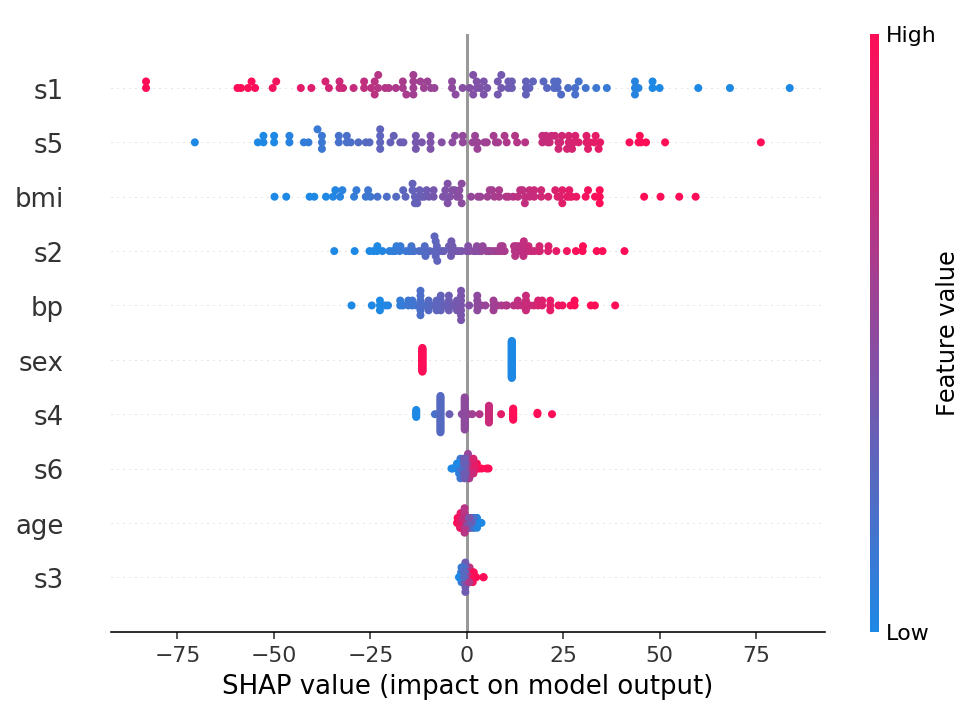

In [4]:
shap_values = ex.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

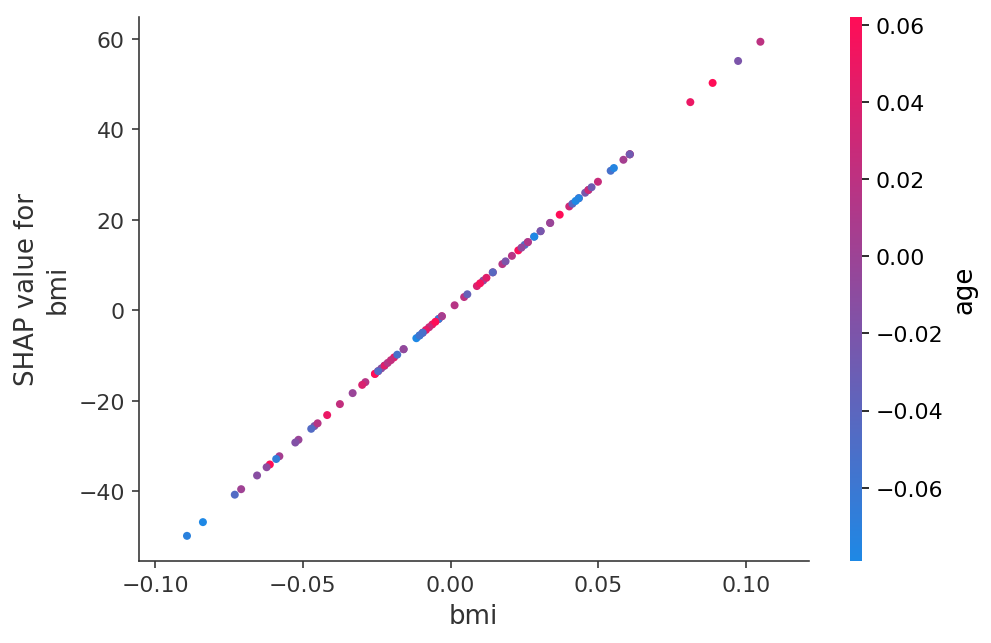

In [5]:
shap.dependence_plot("bmi", shap_values, X_test)

In [6]:
shap.force_plot(ex.expected_value, shap_values, X_test)

## Decision tree regressor

Root mean squared test error = 71.98699151013147


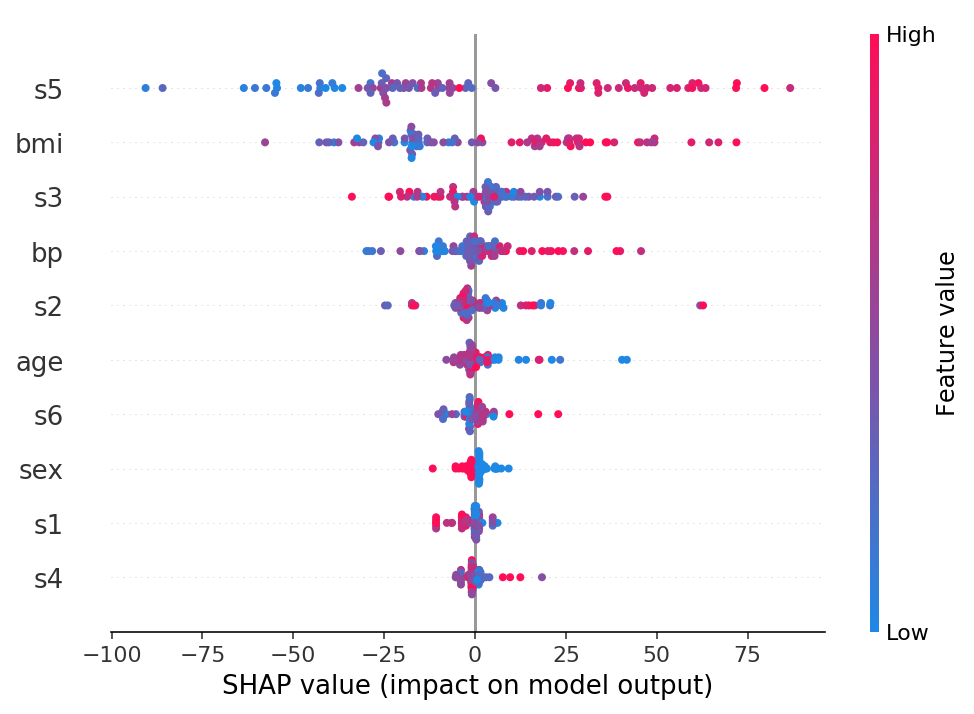

In [7]:
from sklearn import tree
dtree = tree.DecisionTreeRegressor(min_samples_split=20)
dtree.fit(X_train, y_train)
print_accuracy(dtree.predict)

# explain all the predictions in the test set
ex = shap.TreeExplainer(dtree)
shap_values = ex.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

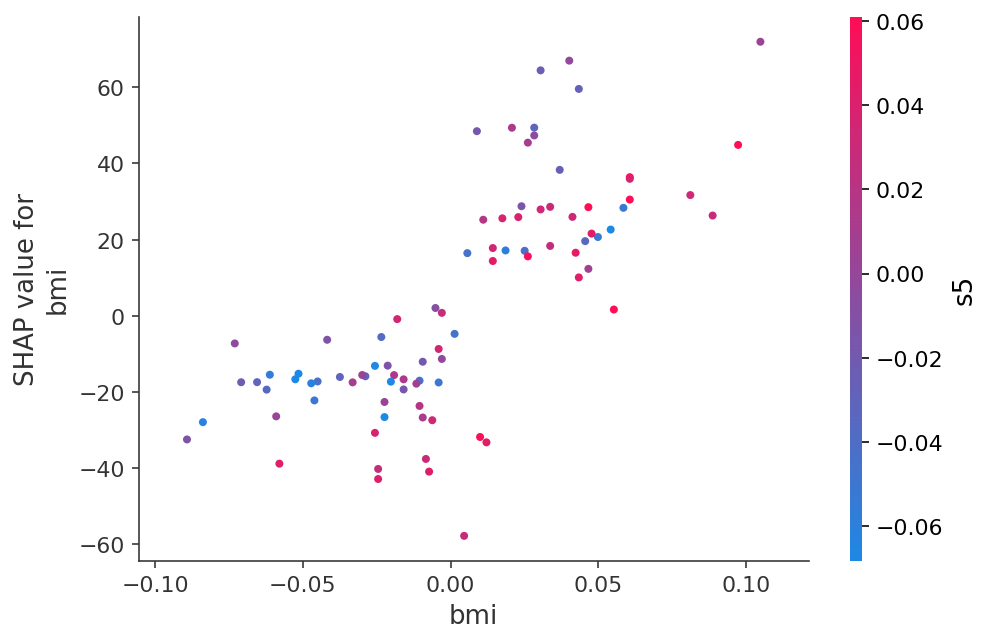

In [8]:
shap.dependence_plot("bmi", shap_values, X_test)

In [9]:
shap.force_plot(ex.expected_value, shap_values, X_test)

## Random forest

Using the fast `TreeExplainer` implementation.

Root mean squared test error = 61.24795842972228


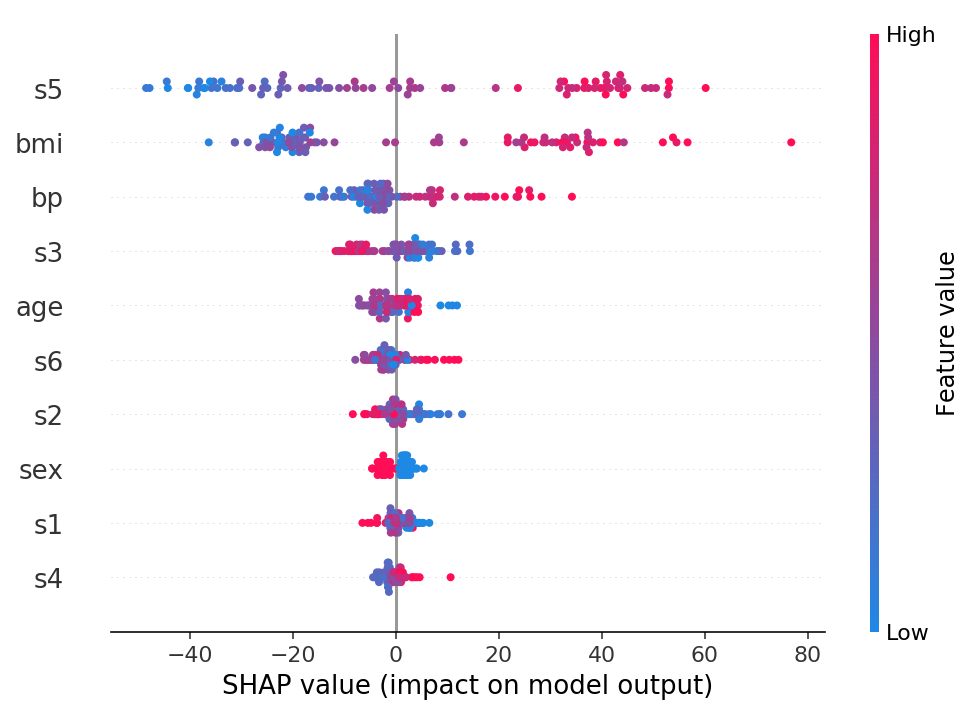

In [10]:
from sklearn.ensemble import RandomForestRegressor
rforest = RandomForestRegressor(n_estimators=1000, max_depth=None, min_samples_split=2, random_state=0)
rforest.fit(X_train, y_train)
print_accuracy(rforest.predict)

# explain all the predictions in the test set
explainer = shap.TreeExplainer(rforest)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

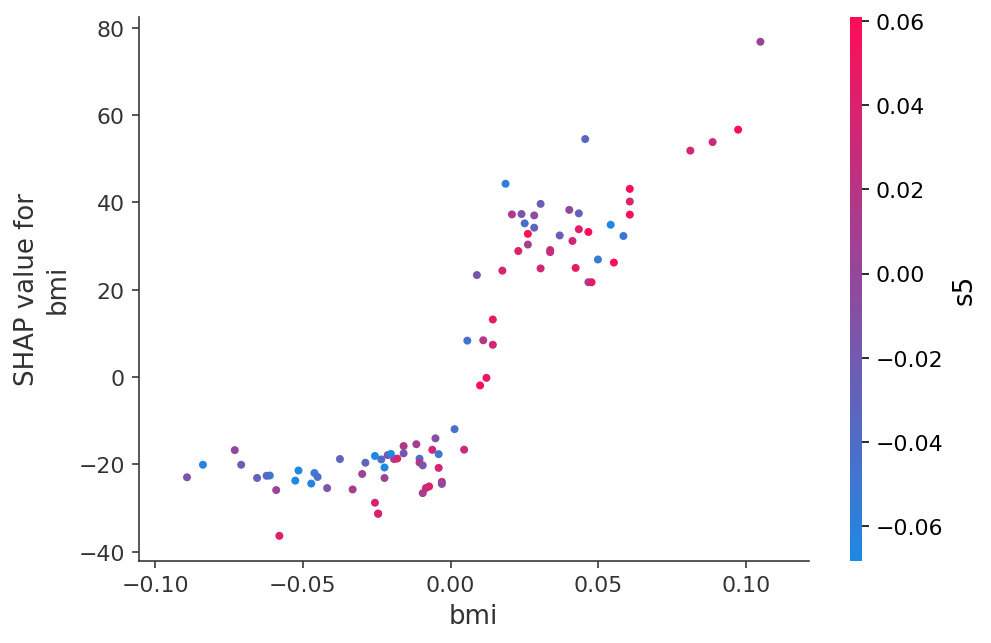

In [11]:
shap.dependence_plot("bmi", shap_values, X_test)

In [12]:
shap.force_plot(explainer.expected_value, shap_values, X_test)

## Neural network

Root mean squared test error = 58.517105754085364


100%|██████████| 89/89 [00:19<00:00,  4.65it/s]


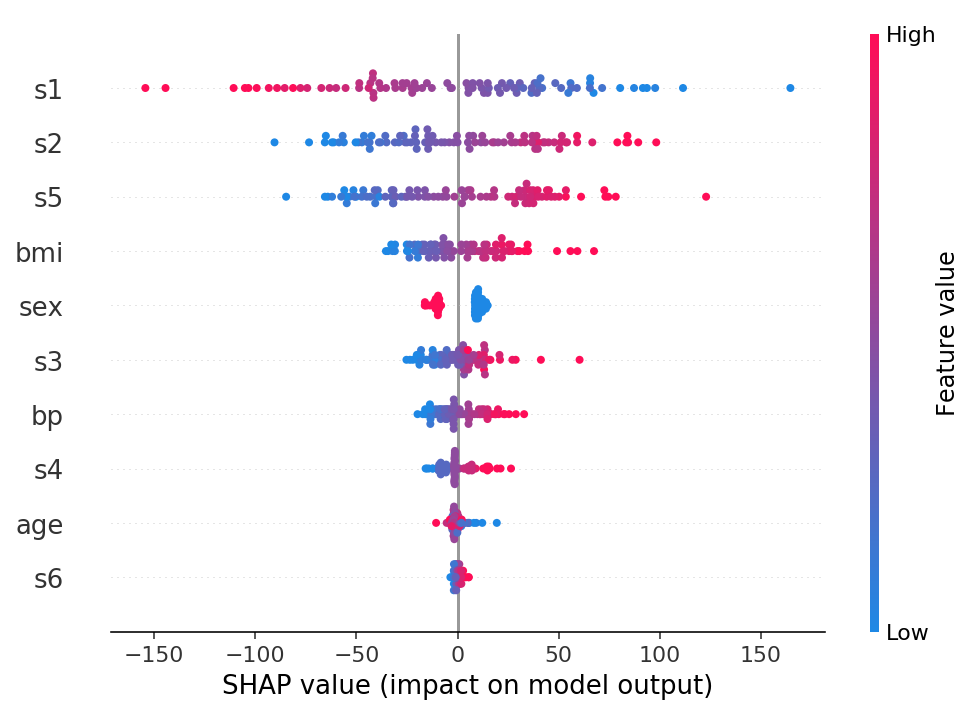

In [13]:
from sklearn.neural_network import MLPRegressor
nn = MLPRegressor(solver='lbfgs', alpha=1e-1, hidden_layer_sizes=(5, 2), random_state=0)
nn.fit(X_train, y_train)
print_accuracy(nn.predict)

# explain all the predictions in the test set
explainer = shap.KernelExplainer(nn.predict, X_train_summary)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

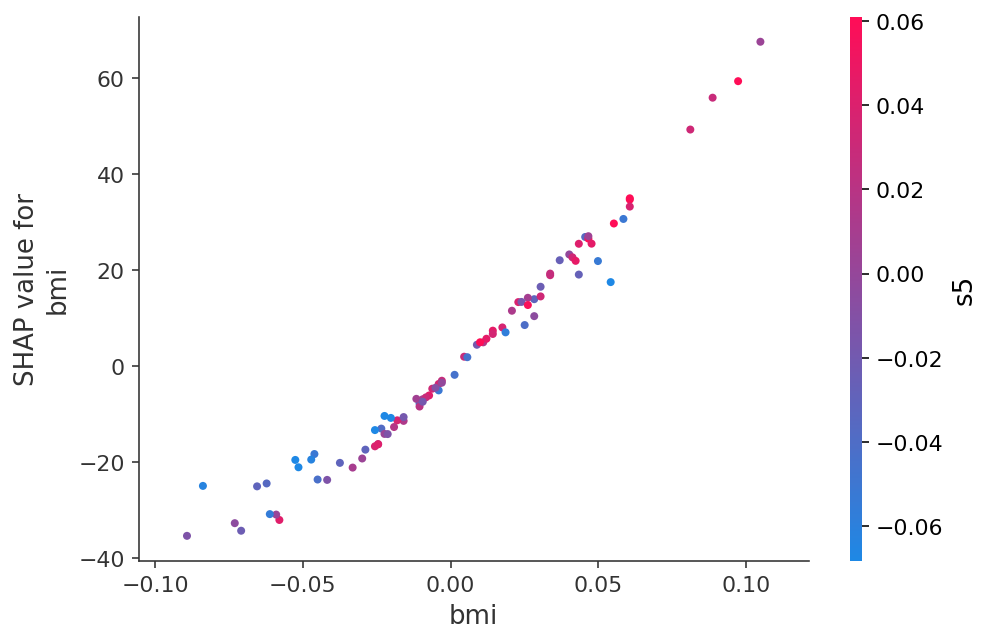

In [14]:
shap.dependence_plot("bmi", shap_values, X_test)

In [15]:
shap.force_plot(explainer.expected_value, shap_values, X_test)